# QCTO - Workplace Module

### Project Title: Insurance Claims Capstone Project
#### Done By: Kennety Mashishi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data, Data Collection and Pre-processing</a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

**Problem:**
Insurance fraud is a big problem in our market. It's costing the industry billions of dollars every year. We need to find a way to identify fraudulent claims before they cause significant financial damage.

**Why it matters:**
1. Financial: $45 billion market with only 1% insured catastrophe coverage  
2. Risk: High unemployment (30%) and low market penetration (<50%)
3. Knowledge Gap: Many customers don't understand insurance value

**Core Challenges:**
1. Affordability ($25/day cost, 10x higher than other countries)
2. Insurance Knowledge (education gap)
3. Target Marketing (reaching right customers)

**Solution Goal:**  
Build ML model to accurately flag potentially fraudulent claims to:
- Reduce financial losses
- Protect legitimate customers
- Improve risk assessment
---

# Links

Trello   :  https://trello.com/invite/b/679140bed881bbff1ce54c0b/ATTI38ce3245f326861aab900632d87233baA6F99368/explore-ai-capstone-project

Git Repo :  https://github.com/KennyM28/Explore_AI-KS_Mashishi-Capstone.git

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Loading Data, Data Collection and Pre-processing**
<a href=#cont>Back to Table of Contents</a>
---

In [2]:
df = pd.read_csv("insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
print(df.dtypes)


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
print("Total columns:", len(df.columns))                            

Total columns: 40


In [6]:
print(df.shape)


(1000, 40)


## Descriptive Statistics and Data Analysis Processes

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To transform raw insurance claims data into a clean, reliable dataset suitable for fraud detection analysis by implementing systematic data quality improvements and relevant filtering mechanisms.
* **Details:** Handle Missing Values, Outlier Treatment, Check Duplicates, Error Correction, Data Reduction, Remove redundant features
---

### Missing Values

In [7]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

print("\nNull Percentages:")
for col, percentage in null_percentages.items():
    print(f"{col}: {percentage:.2f}%")


Null Percentages:
months_as_customer: 0.00%
age: 0.00%
policy_number: 0.00%
policy_bind_date: 0.00%
policy_state: 0.00%
policy_csl: 0.00%
policy_deductable: 0.00%
policy_annual_premium: 0.00%
umbrella_limit: 0.00%
insured_zip: 0.00%
insured_sex: 0.00%
insured_education_level: 0.00%
insured_occupation: 0.00%
insured_hobbies: 0.00%
insured_relationship: 0.00%
capital-gains: 0.00%
capital-loss: 0.00%
incident_date: 0.00%
incident_type: 0.00%
collision_type: 0.00%
incident_severity: 0.00%
authorities_contacted: 9.10%
incident_state: 0.00%
incident_city: 0.00%
incident_location: 0.00%
incident_hour_of_the_day: 0.00%
number_of_vehicles_involved: 0.00%
property_damage: 0.00%
bodily_injuries: 0.00%
witnesses: 0.00%
police_report_available: 0.00%
total_claim_amount: 0.00%
injury_claim: 0.00%
property_claim: 0.00%
vehicle_claim: 0.00%
auto_make: 0.00%
auto_model: 0.00%
auto_year: 0.00%
fraud_reported: 0.00%
_c39: 100.00%


In [8]:
ins_df = df.drop("_c39", axis = 1) 

In [9]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [10]:
ins_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
summary_stats = ins_df.describe(percentiles=[0.25, 0.5, 0.75])
print(summary_stats)

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

In [12]:
def calculate_five_number_summary(df):
    """
    Calculate five number summary for numerical columns in the dataset
    """
    # Numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Summary statistics
    summary = df[numeric_cols].agg([
        'min',
        lambda x: x.quantile(0.25),
        'median',
        lambda x: x.quantile(0.75),
        'max'
    ]).round(2)
    
    summary.index = ['Min', 'Q1', 'Median', 'Q3', 'Max']
    
    return summary

In [13]:

data_summary = calculate_five_number_summary(ins_df)
print("\nFive Number Summary:")
print(data_summary)


Five Number Summary:
        months_as_customer   age  policy_number  policy_deductable  \
Min                   0.00  19.0      100804.00              500.0   
Q1                  115.75  32.0      335980.25              500.0   
Median              199.50  38.0      533135.00             1000.0   
Q3                  276.25  44.0      759099.75             2000.0   
Max                 479.00  64.0      999435.00             2000.0   

        policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
Min                    433.33      -1000000.0     430104.0            0.0   
Q1                    1089.61             0.0     448404.5            0.0   
Median                1257.20             0.0     466445.5            0.0   
Q3                    1415.70             0.0     603251.0        51025.0   
Max                   2047.59      10000000.0     620962.0       100500.0   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
Min        -111

In [14]:
print(ins_df.isnull().sum())

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [15]:
mode_value = ins_df['authorities_contacted'].mode()[0]
print(f"Mode value: {mode_value}")
# ins_df.fillna(ins_df.mean(), inplace=True) 


Mode value: Police


In [16]:
ins_df['authorities_contacted'] = ins_df['authorities_contacted'].fillna(mode_value)

In [17]:
# Standardize text data
for col in ins_df.select_dtypes(['object']):
   ins_df[col] = ins_df[col].str.strip().str.lower()


In [18]:
print("Duplicate rows:", ins_df.duplicated().sum())


Duplicate rows: 0


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships. Discover hidden patterns, anomalies, and relationships within insurance claims data to identify potential indicators of fraudulent behavior.
* **Details:** I used statistics and visualizations to explore the data. This includes histograms, box plots, scatter plots, and correlation matrices. I generated summary statistics. I created visualizations showing distribution of claims across different categories.
---


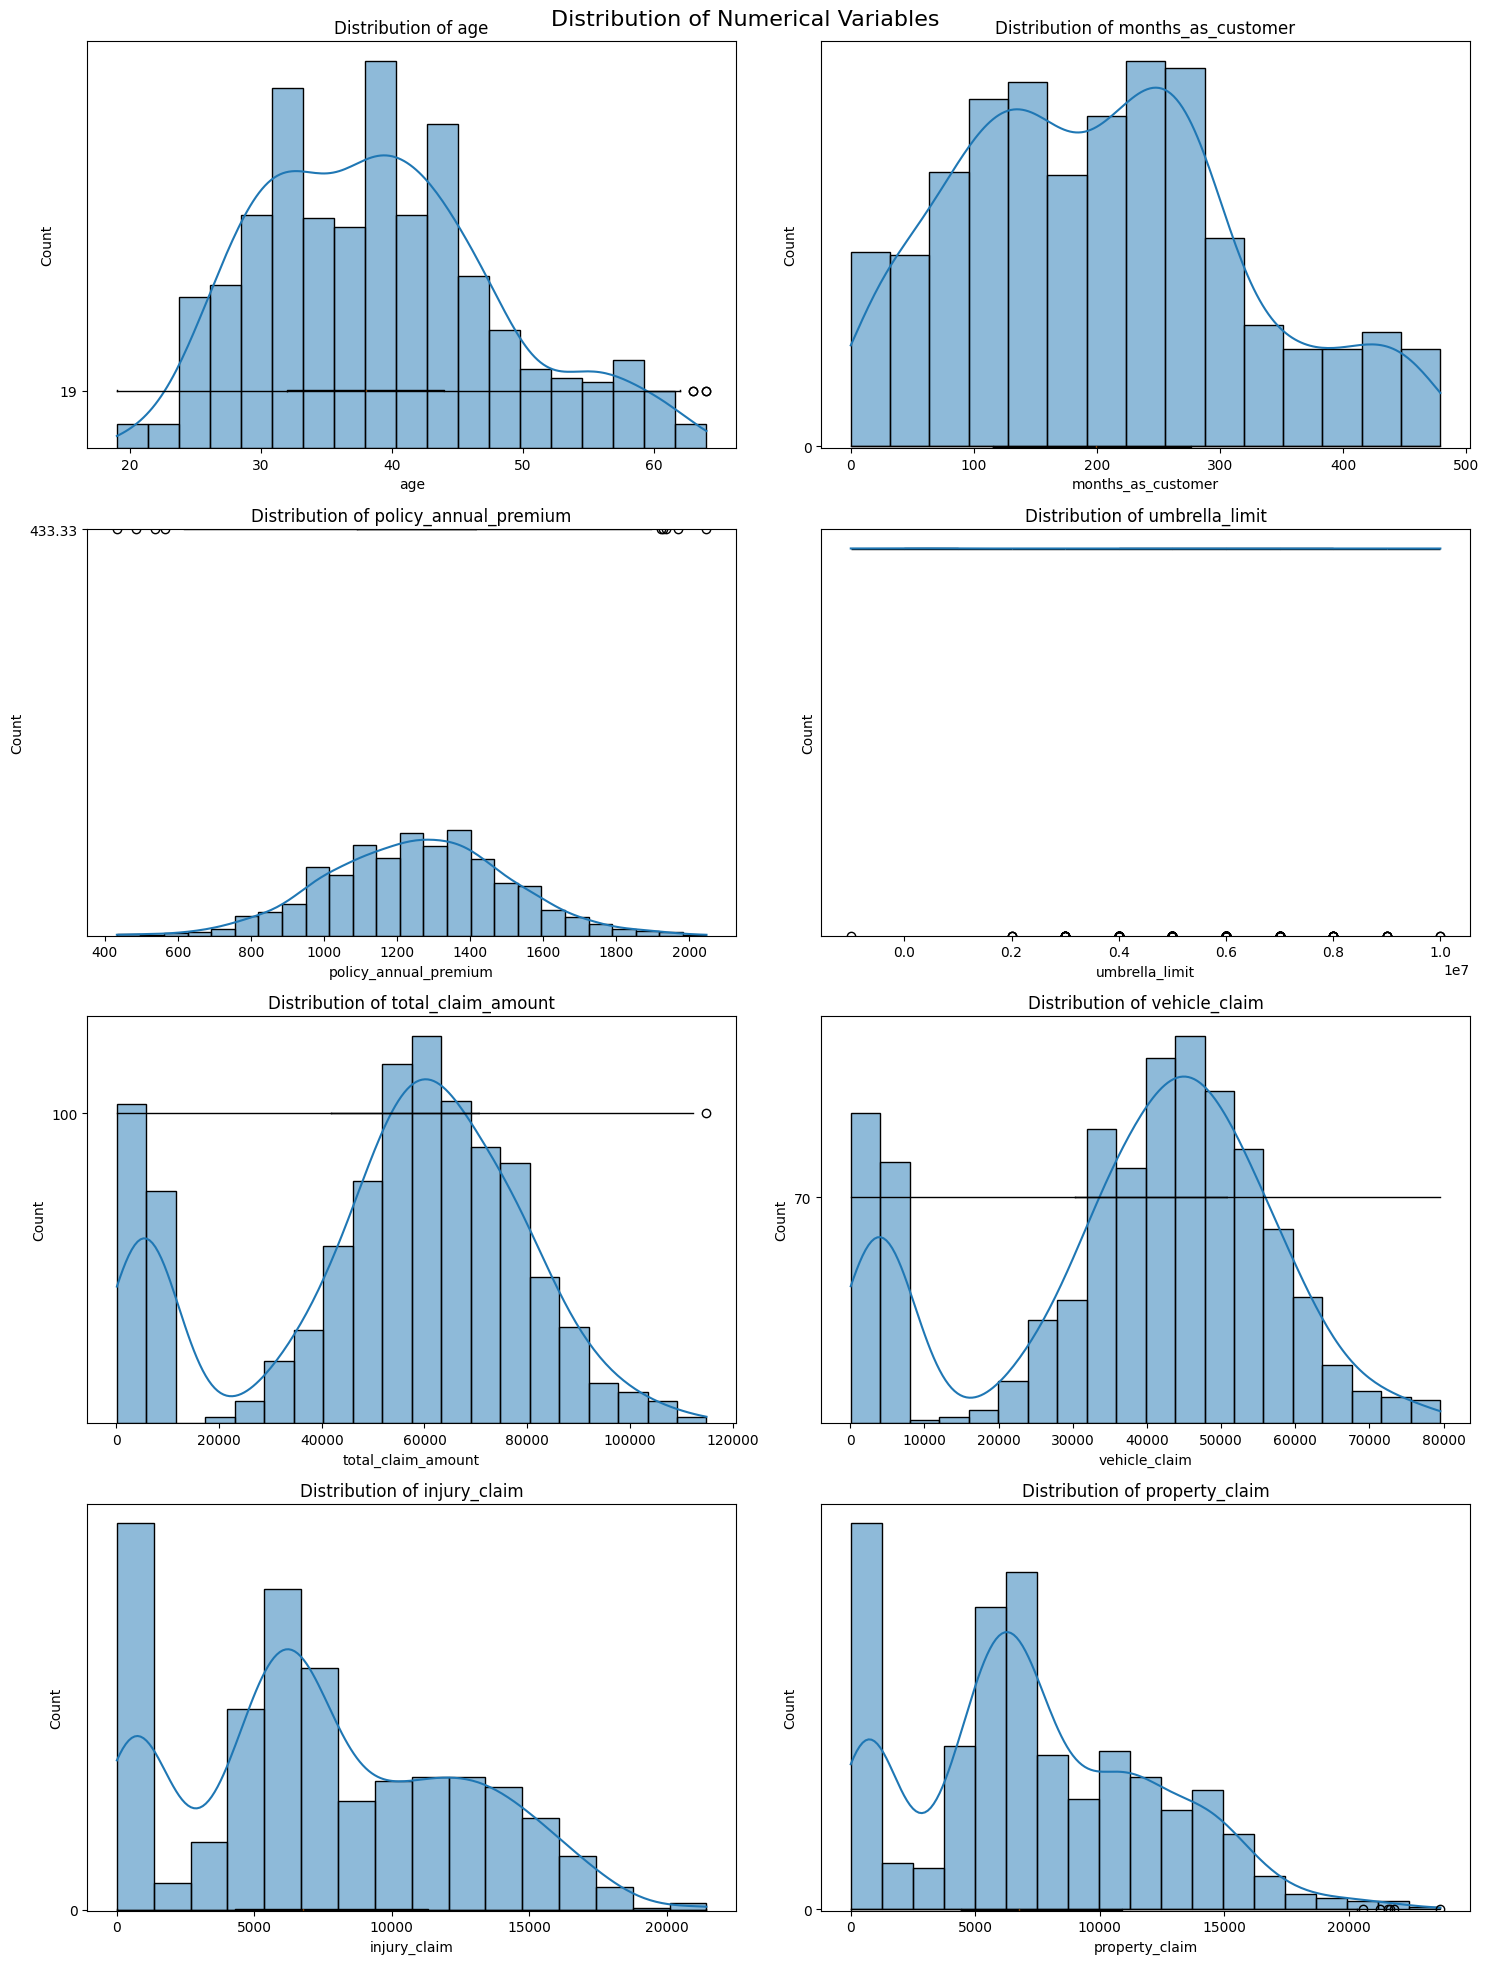

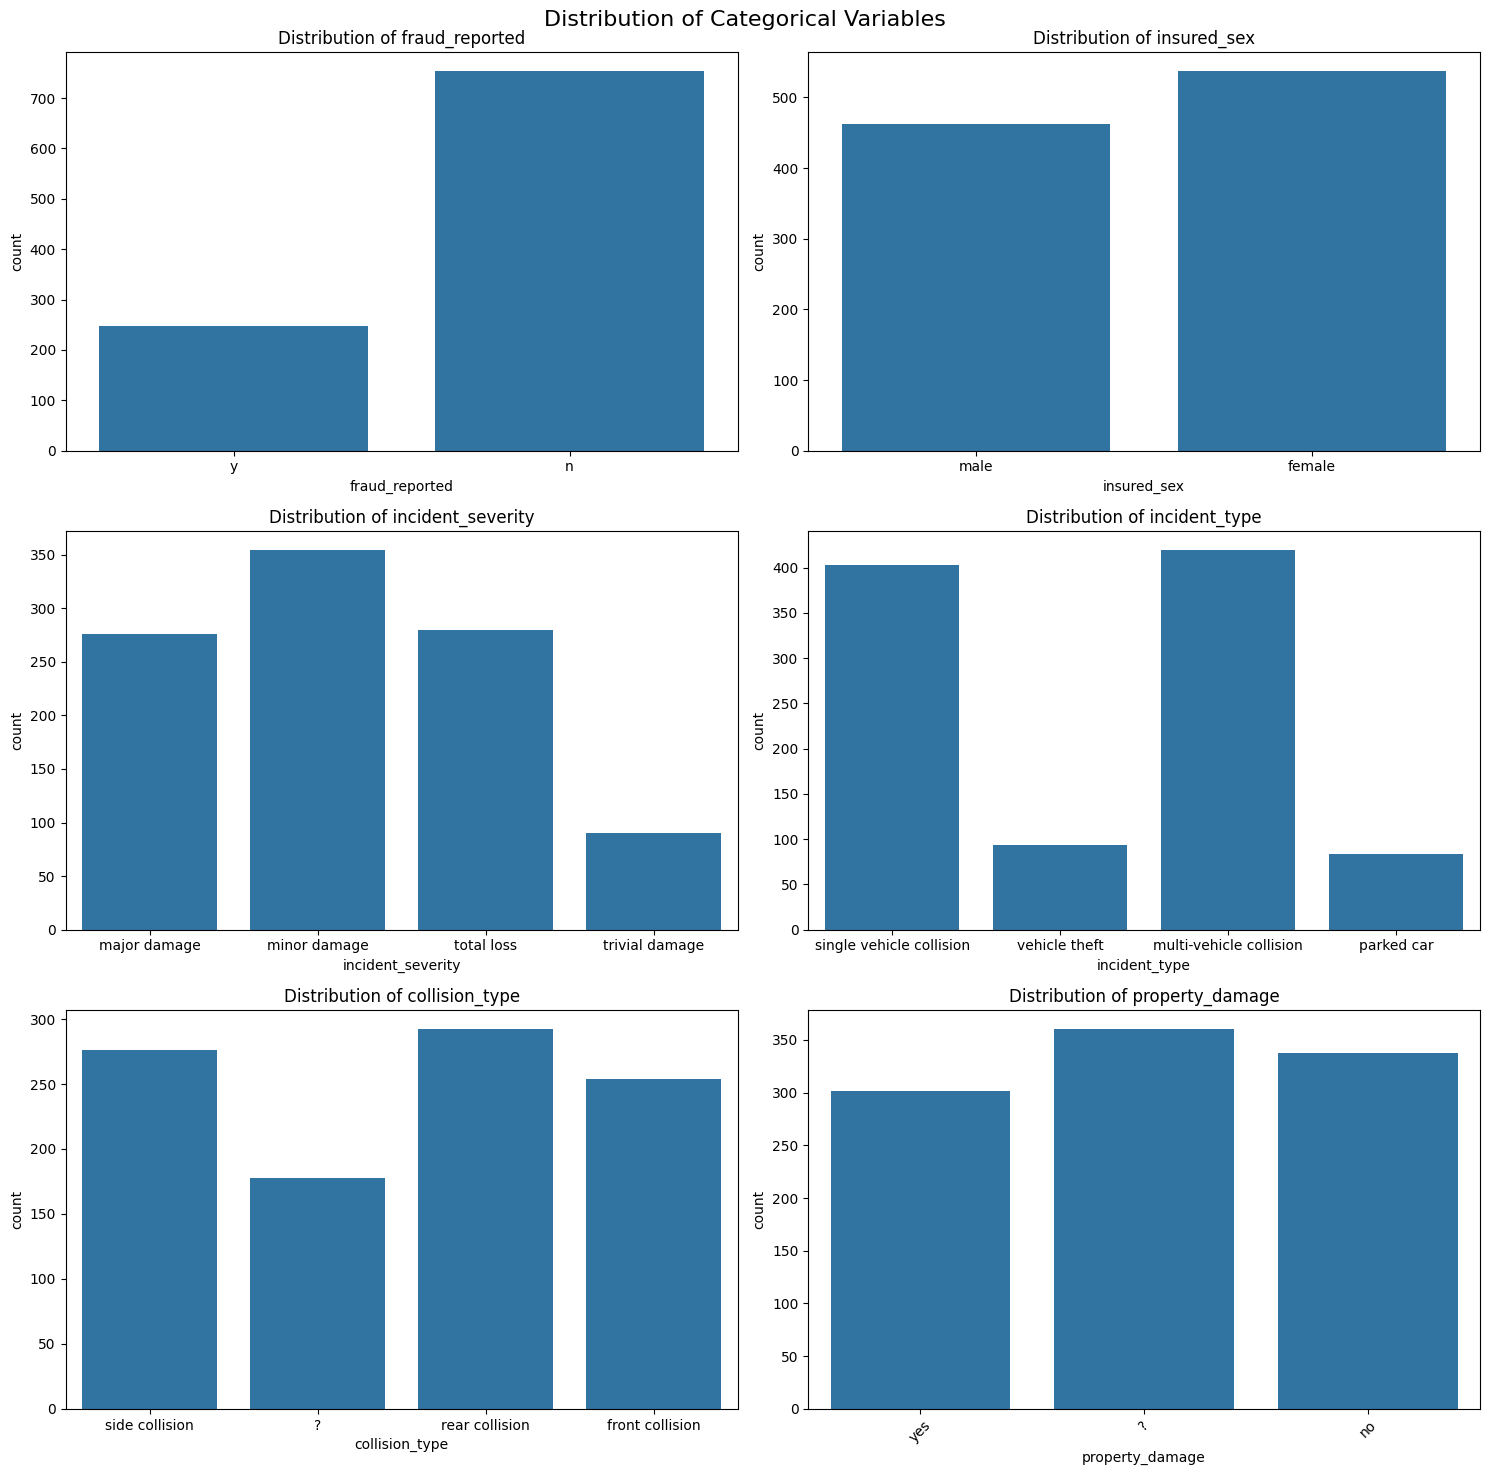

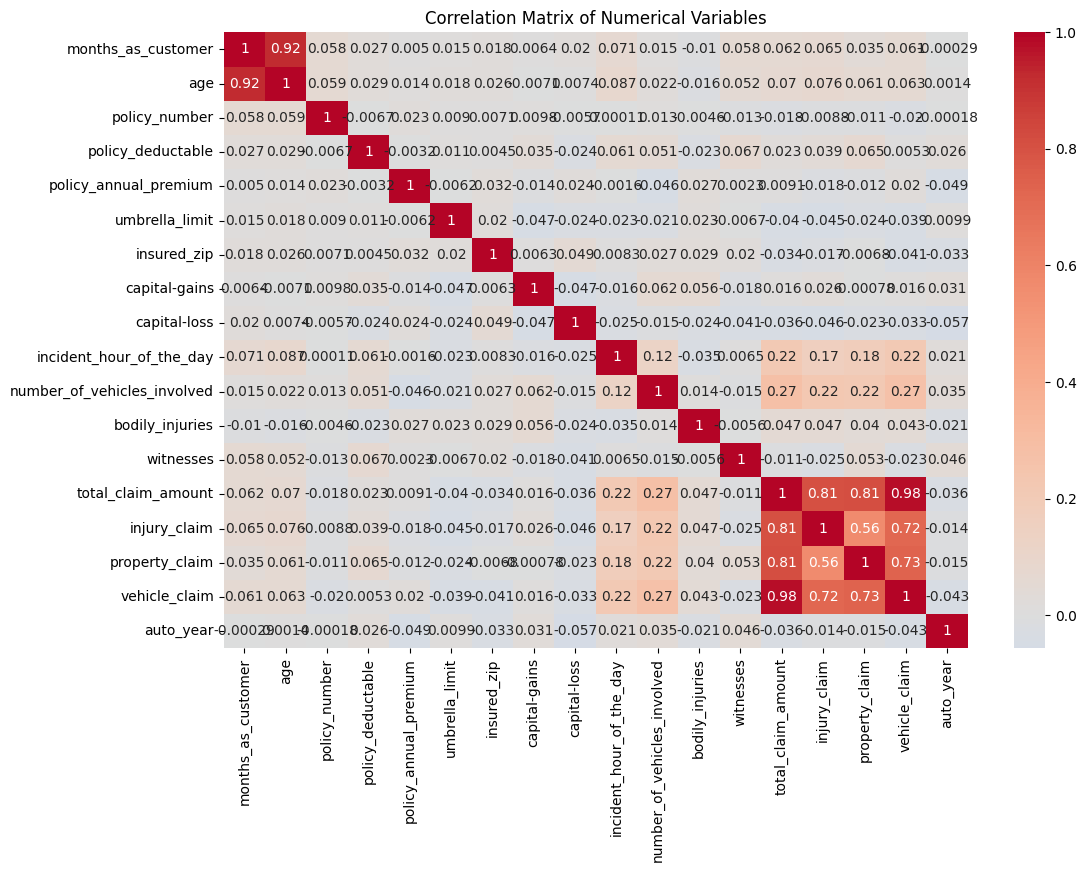

In [19]:


def plot_data_distributions(df):
   # Set up the figure layout
   numerical_cols = ['age', 'months_as_customer', 'policy_annual_premium', 'umbrella_limit', 
                    'total_claim_amount', 'vehicle_claim', 'injury_claim', 'property_claim']
   
   fig, axes = plt.subplots(4, 2, figsize=(15, 20))
   fig.suptitle('Distribution of Numerical Variables', fontsize=16)
   
   # Plotting
   for i, col in enumerate(numerical_cols):
       row = i // 2
       col_idx = i % 2
       
       # Histogram
       sns.histplot(data=df, x=col, ax=axes[row, col_idx], kde=True)
       axes[row, col_idx].set_title(f'Distribution of {col}')
       
       # Boxplot
       axes[row, col_idx].boxplot(df[col], vert=False, positions=[df[col].min()])
       
   plt.tight_layout()
   plt.show()

def plot_missing_values(df):
   # Missing values
   missing = df.isnull().sum()
   missing = missing[missing > 0]
   
   # Plotting
   plt.figure(figsize=(10, 6))
   plt.bar(range(len(missing)), missing.values)
   plt.title('Missing Values by Column')
   plt.xticks(range(len(missing)), missing.index, rotation=45)
   plt.ylabel('Count of Missing Values')
   plt.show()

def plot_categorical_distributions(df):
   categorical_cols = ['fraud_reported', 'insured_sex', 'incident_severity', 
                      'incident_type', 'collision_type', 'property_damage']
   
   fig, axes = plt.subplots(3, 2, figsize=(15, 15))
   fig.suptitle('Distribution of Categorical Variables', fontsize=16)
   
   for i, col in enumerate(categorical_cols):
       row = i // 2
       col_idx = i % 2
       
       sns.countplot(data=df, x=col, ax=axes[row, col_idx])
       axes[row, col_idx].set_title(f'Distribution of {col}')
       plt.xticks(rotation=45)
       
   plt.tight_layout()
   plt.show()

def plot_correlation_matrix(df):
   # Numerical columns
   numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
   
   # Correlations
   corr = df[numerical_cols].corr()
   
   # Plotting
   plt.figure(figsize=(12, 8))
   sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
   plt.title('Correlation Matrix of Numerical Variables')
   plt.show()

# Execute all visualizations
plot_data_distributions(ins_df)
plot_categorical_distributions(ins_df) 
plot_correlation_matrix(ins_df)

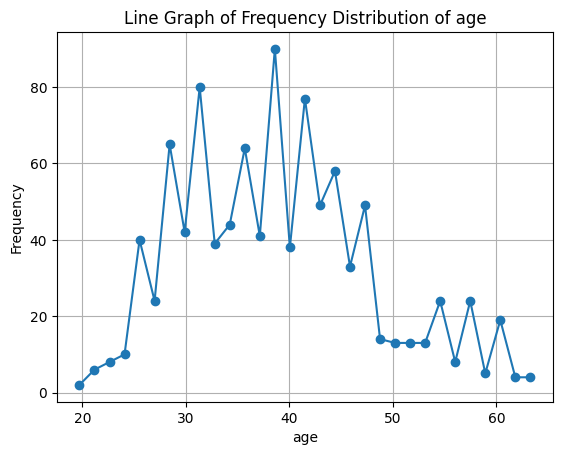

In [20]:
age = 'age'

n_data_points = len(ins_df[age])
num_bins_sqrt = int(np.sqrt(n_data_points))

# Histogram data
hist, bin_edges = np.histogram(ins_df[age], bins=num_bins_sqrt)

bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the line graph
plt.plot(bin_midpoints, hist, marker='o', linestyle='-')

plt.xlabel(age)
plt.ylabel('Frequency')
plt.title(f'Line Graph of Frequency Distribution of {age}')

# Display the line graph
plt.grid(True)
plt.show()

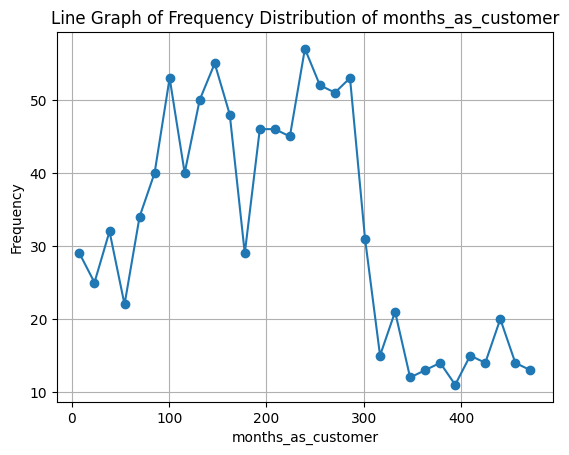

In [21]:
months_as_customer = 'months_as_customer'


n_data_points = len(ins_df[months_as_customer])
num_bins_sqrt = int(np.sqrt(n_data_points))

# Histogram data
hist, bin_edges = np.histogram(ins_df[months_as_customer], bins=num_bins_sqrt)

bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the line graph
plt.plot(bin_midpoints, hist, marker='o', linestyle='-')

plt.xlabel(months_as_customer)
plt.ylabel('Frequency')
plt.title(f'Line Graph of Frequency Distribution of {months_as_customer}')

# Display the line graph
plt.grid(True)
plt.show()

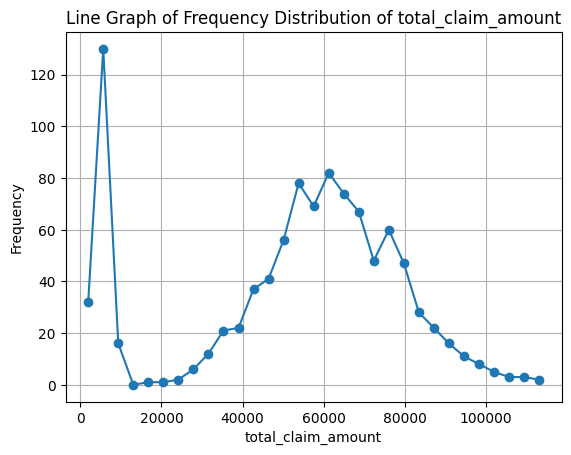

In [22]:
total_claim_amount = 'total_claim_amount'

n_data_points = len(ins_df[total_claim_amount])

def plot_frequency_line_graph(df, column, num_bins):
    hist, bin_edges = np.histogram(df[column], bins=num_bins)
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, hist, marker='o', linestyle='-')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Line Graph of Frequency Distribution of {column}')
    plt.grid(True)
    plt.show()

# Using the square root rule
num_bins_sqrt = int(np.sqrt(n_data_points))
plot_frequency_line_graph(ins_df, total_claim_amount, num_bins_sqrt)

In [23]:
fraud_counts = df['fraud_reported'].value_counts()
print("Class distribution:")
print(fraud_counts)
print(f"Fraud rate: {fraud_counts['Y'] / len(df) * 100:.2f}%")

is_imbalanced = min(fraud_counts) / len(df) < 0.3
print(f"Dataset is{'imbalanced' if is_imbalanced else 'balanced'}")

Class distribution:
fraud_reported
N    753
Y    247
Name: count, dtype: int64
Fraud rate: 24.70%
Dataset isimbalanced


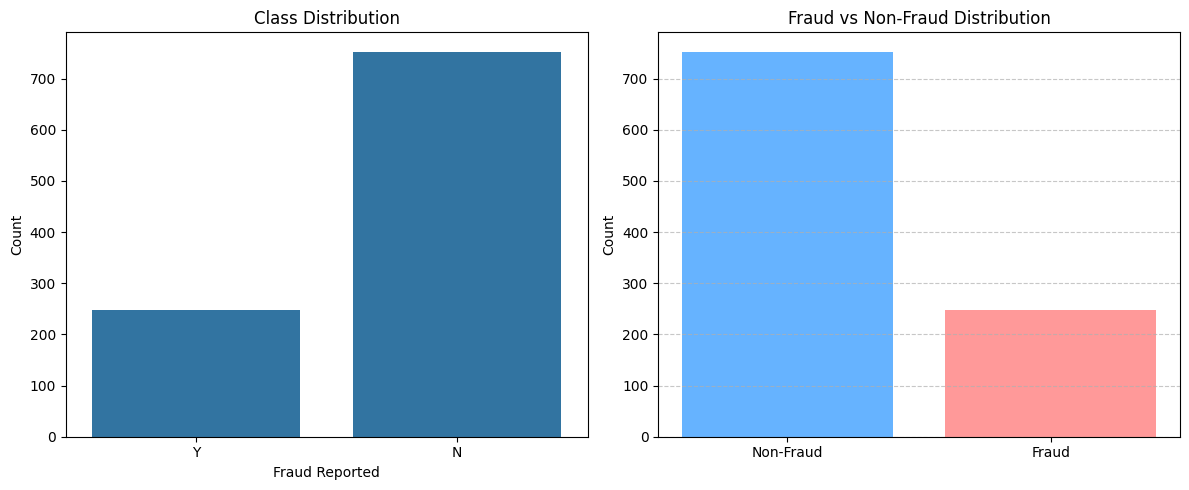

Imbalance ratio: 0.328
Majority to minority ratio: 753 : 247 (3.05:1)


In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='fraud_reported')
plt.title('Class Distribution')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

# Bar chart
plt.subplot(1, 2, 2)
plt.bar(['Non-Fraud', 'Fraud'], fraud_counts, color=['#66b3ff', '#ff9999'])
plt.title('Fraud vs Non-Fraud Distribution')
plt.ylabel('Count')

# Add y-grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

imbalance_ratio = fraud_counts.min() / fraud_counts.max()
print(f"Imbalance ratio: {imbalance_ratio:.3f}")
print(f"Majority to minority ratio: {fraud_counts.max()} : {fraud_counts.min()} " 
      f"({fraud_counts.max()/fraud_counts.min():.2f}:1)")

In [25]:
bin_edges = [0, 30, 55, 100]  
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

ins_df['ages_category'] = pd.cut(ins_df['age'], bins=bin_edges, labels=bin_labels)

In [26]:
ins_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,yes,71610,6510,13020,52080,saab,92x,2004,y,Middle Aged
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,mercedes,e400,2007,y,Middle Aged
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,no,34650,7700,3850,23100,dodge,ram,2007,n,Young Adult
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,no,63400,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,no,6500,1300,650,4550,accura,rsx,2009,n,Middle Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,oh,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,honda,accord,2006,n,Middle Aged
996,285,41,186934,2014-01-05,il,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,volkswagen,passat,2015,n,Middle Aged
997,130,34,918516,2003-02-17,oh,250/500,500,1383.49,3000000,442797,...,yes,67500,7500,7500,52500,suburu,impreza,1996,n,Middle Aged
998,458,62,533940,2011-11-18,il,500/1000,2000,1356.92,5000000,441714,...,yes,46980,5220,5220,36540,audi,a5,1998,n,Elderly


In [27]:
bin_edges_customer = [0, 25, 150, 500] 
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client'] 
ins_df['customer_category'] = pd.cut(ins_df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [28]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,saab,92x,2004,y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,mercedes,e400,2007,y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,dodge,ram,2007,n,Young Adult,Established Client
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,accura,rsx,2009,n,Middle Aged,Long-Term Client


## Creating New Features

In [29]:
ins_df["Contract Years"] = ins_df["months_as_customer"]/12

In [30]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,6510,13020,52080,saab,92x,2004,y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,780,780,3510,mercedes,e400,2007,y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,dodge,ram,2007,n,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,accura,rsx,2009,n,Middle Aged,Long-Term Client,19.000000


In [31]:

from sklearn.preprocessing import LabelEncoder

def create_engineered_features(df):
    df_new = df.copy()
    
    # Time-Based Features
    df_new['policy_bind_date'] = pd.to_datetime(df_new['policy_bind_date'])
    df_new['incident_date'] = pd.to_datetime(df_new['incident_date'])
    
    df_new['policy_duration'] = (df_new['incident_date'] - df_new['policy_bind_date']).dt.days
    df_new['incident_hour_category'] = pd.cut(df_new['incident_hour_of_the_day'], 
                                            bins=[0,6,12,18,24], 
                                            labels=['Night','Morning','Afternoon','Evening'])
    df_new['weekend_incident'] = df_new['incident_date'].dt.dayofweek.isin([5,6]).astype(int)

    # Vehicle Features
    df_new['vehicle_age'] = datetime.now().year - df_new['auto_year']
    df_new['is_luxury_vehicle'] = df_new['auto_make'].isin(['Mercedes', 'BMW', 'Audi', 'Lexus']).astype(int)
    
    # Risk Score Features
    df_new['risk_score'] = (
        (df_new['vehicle_age'] * 0.2) +
        (df_new['number_of_vehicles_involved'] * 0.3) +
        (df_new['witnesses'].fillna(0) * 0.1) +
        (df_new['bodily_injuries'].fillna(0) * 0.4)
    )
    
    # Financial Features
    df_new['premium_per_thousand'] = df_new['policy_annual_premium'] / (df_new['policy_deductable']/1000)
    df_new['claim_per_premium'] = df_new['total_claim_amount'] / df_new['policy_annual_premium']
    df_new['umbrella_coverage_ratio'] = df_new['umbrella_limit'] / df_new['policy_annual_premium']
    
    # Claims Breakdown Features
    total_claim = df_new['total_claim_amount']
    df_new['injury_claim_pct'] = df_new['injury_claim'] / total_claim
    df_new['property_claim_pct'] = df_new['property_claim'] / total_claim
    df_new['vehicle_claim_pct'] = df_new['vehicle_claim'] / total_claim
    
    # Customer Profile Features
    df_new['high_risk_hobby'] = df_new['insured_hobbies'].isin(
        ['skydiving', 'bungie-jumping', 'base-jumping', 'paintball']
    ).astype(int)
    
    df_new['high_education'] = df_new['insured_education_level'].isin(
        ['PhD', 'Masters', 'MD', 'JD']
    ).astype(int)
    
    # Incident Severity Features
    severity_map = {
        'Minor Damage': 1,
        'Major Damage': 2,
        'Total Loss': 3,
        'Trivial Damage': 0
    }
    df_new['incident_severity_score'] = df_new['incident_severity'].map(severity_map)
    
    # Location Based Features
    df_new['same_state_accident'] = (df_new['policy_state'] == df_new['incident_state']).astype(int)
    
    # Composite Features
    df_new['claims_risk_score'] = (
        df_new['total_claim_amount'] * 
        df_new['incident_severity_score'] * 
        df_new['number_of_vehicles_involved']
    )
    
    # Age-based Features
    df_new['age_group'] = pd.cut(df_new['age'], 
                                bins=[0,25,35,45,55,100], 
                                labels=['Young','Adult','Middle','Senior','Elder'])
    
    # Binary Flags
    df_new['has_umbrella'] = (df_new['umbrella_limit'] > 0).astype(int)
    df_new['has_property_damage'] = (df_new['property_damage'] == 'YES').astype(int)
    df_new['has_police_report'] = (df_new['police_report_available'] == 'YES').astype(int)
    
    # Customer Value Features
    df_new['customer_value_score'] = (
        (df_new['months_as_customer'] * 0.3) + 
        (df_new['policy_annual_premium'] * 0.4) +
        (df_new['umbrella_limit'] * 0.3)
    ) / 1000

    return df_new


In [32]:
from datetime import datetime

engineered_df = create_engineered_features(ins_df)

# Print new features
new_features = [col for col in engineered_df.columns if col not in ins_df.columns]
print("New engineered features:", new_features)

New engineered features: ['policy_duration', 'incident_hour_category', 'weekend_incident', 'vehicle_age', 'is_luxury_vehicle', 'risk_score', 'premium_per_thousand', 'claim_per_premium', 'umbrella_coverage_ratio', 'injury_claim_pct', 'property_claim_pct', 'vehicle_claim_pct', 'high_risk_hobby', 'high_education', 'incident_severity_score', 'same_state_accident', 'claims_risk_score', 'age_group', 'has_umbrella', 'has_property_damage', 'has_police_report', 'customer_value_score']


In [33]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = [
    'policy_state', 'insured_sex', 'insured_education_level', 
    'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'incident_city',
    'property_damage', 'police_report_available', 'auto_make', 'auto_model'
]

encoded_df = engineered_df.copy()
for col in categorical_cols:
    encoded_df[f'{col}_encoded'] = le.fit_transform(encoded_df[col].astype(str))

# Select features for final dataset
features_to_keep = [
    # Numerical features
    'age', 'months_as_customer', 'policy_annual_premium', 'umbrella_limit',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
    'injury_claim', 'property_claim', 'vehicle_claim', 'total_claim_amount',
    
    # Categorical features
    'policy_state_encoded', 'insured_sex_encoded', 'insured_education_level_encoded',
    'insured_occupation_encoded', 'insured_hobbies_encoded', 'incident_type_encoded',
    'collision_type_encoded', 'incident_severity_encoded', 'authorities_contacted_encoded',
    'auto_make_encoded', 'auto_model_encoded',
    
    # Engineered features
    'policy_duration', 'vehicle_age', 'is_luxury_vehicle', 'risk_score',
    'premium_per_thousand', 'claim_per_premium', 'umbrella_coverage_ratio',
    'injury_claim_pct', 'property_claim_pct', 'vehicle_claim_pct',
    'high_risk_hobby', 'high_education', 'incident_severity_score',
    'same_state_accident', 'claims_risk_score', 'customer_value_score',
    'has_umbrella', 'has_property_damage', 'has_police_report',
    'weekend_incident'
]


final_df = encoded_df[features_to_keep].copy()

# Prospective target variable
final_df['fraud_reported'] = (df['fraud_reported'] == 'Y').astype(int)

In [34]:
def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    # Fill numerical missing values with median
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Fill categorical missing values with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

In [35]:

final_df = handle_missing_values(final_df)

c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [36]:
final_df

,age,months_as_customer,policy_annual_premium,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,...,high_education,incident_severity_score,same_state_accident,claims_risk_score,customer_value_score,has_umbrella,has_property_damage,has_police_report,weekend_incident,fraud_reported
0,48,328,1406.91,0,1,1,2,6510,13020,52080,...,0,NaN,0,NaN,0.661164,0,0,0,1,1
1,42,228,1197.22,5000000,1,0,0,780,780,3510,...,0,NaN,0,NaN,1500.547288,1,0,0,0,1
2,29,134,1413.14,5000000,3,2,3,7700,3850,23100,...,0,NaN,0,NaN,1500.605456,1,0,0,1,0
3,41,256,1415.74,6000000,1,1,2,6340,6340,50720,...,0,NaN,0,NaN,1800.643096,1,0,0,1,1
4,44,228,1583.91,6000000,1,0,1,1300,650,4550,...,0,NaN,0,NaN,1800.701964,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,3,1310.80,0,1,0,1,17440,8720,61040,...,0,NaN,0,NaN,0.525220,0,0,0,1,0
996,41,285,1436.79,0,1,2,3,18080,18080,72320,...,0,NaN,0,NaN,0.660216,0,0,0,1,0
997,34,130,1383.49,3000000,3,2,3,7500,7500,52500,...,0,NaN,0,NaN,900.592396,1,0,0,0,0
998,62,458,1356.92,5000000,1,0,1,5220,5220,36540,...,0,NaN,0,NaN,1500.680168,1,0,0,0,0


## Joining Features

In [37]:
# Print dataset info
print("\nFinal Dataset Info:")
print(final_df.info())

# Print correlation with target
print("\nTop 10 Features Correlated with Fraud:")
correlations = final_df.corr()['fraud_reported'].sort_values(ascending=False)
print(correlations.head(11))


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1000 non-null   int64  
 1   months_as_customer               1000 non-null   int64  
 2   policy_annual_premium            1000 non-null   float64
 3   umbrella_limit                   1000 non-null   int64  
 4   number_of_vehicles_involved      1000 non-null   int64  
 5   bodily_injuries                  1000 non-null   int64  
 6   witnesses                        1000 non-null   int64  
 7   injury_claim                     1000 non-null   int64  
 8   property_claim                   1000 non-null   int64  
 9   vehicle_claim                    1000 non-null   int64  
 10  total_claim_amount               1000 non-null   int64  
 11  policy_state_encoded             1000 non-null   int64  
 12  

In [38]:
final_df = handle_missing_values(final_df)

c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Save to CSV

In [39]:
# Save to CSV
final_df.to_csv('insurance_fraud_final.csv', index=False)

In [40]:
# Descriptive statistics
print("Descriptive Statistics:")
print(final_df.describe())  # Shows count, mean, std, min, 25%, 50%, 75%, max

Descriptive Statistics:
               age  months_as_customer  policy_annual_premium  umbrella_limit  \
count  1000.000000         1000.000000            1000.000000    1.000000e+03   
mean     38.948000          203.954000            1256.406150    1.101000e+06   
std       9.140287          115.113174             244.167395    2.297407e+06   
min      19.000000            0.000000             433.330000   -1.000000e+06   
25%      32.000000          115.750000            1089.607500    0.000000e+00   
50%      38.000000          199.500000            1257.200000    0.000000e+00   
75%      44.000000          276.250000            1415.695000    0.000000e+00   
max      64.000000          479.000000            2047.590000    1.000000e+07   

       number_of_vehicles_involved  bodily_injuries    witnesses  \
count                   1000.00000      1000.000000  1000.000000   
mean                       1.83900         0.992000     1.487000   
std                        1.01888        

In [41]:
print("\nDataset Shape:")
print(final_df.shape)



Dataset Shape:
(1000, 43)


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Models tested: Logistic Regression, Random Forest, Gradient Boosting, Neural Network 

---


In [42]:
# Split features and target
X = final_df.drop('fraud_reported', axis=1)
y = final_df['fraud_reported']

In [43]:
# Train-test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [44]:
# Scale features
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\kenny\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [45]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Check for missing values
print("Missing values in training data:")
missing_values = pd.DataFrame(X_train).isnull().sum()
print(missing_values)

completely_empty = missing_values[missing_values == len(X_train)].index.tolist()
if completely_empty:
    print(f"\nColumns with all values missing: {completely_empty}")

X_train_fixed = X_train.drop(columns=completely_empty)
X_test_fixed = X_test.drop(columns=completely_empty)
print(f"\nRemoved {len(completely_empty)} completely empty columns")


Missing values in training data:
age                                  0
months_as_customer                   0
policy_annual_premium                0
umbrella_limit                       0
number_of_vehicles_involved          0
bodily_injuries                      0
witnesses                            0
injury_claim                         0
property_claim                       0
vehicle_claim                        0
total_claim_amount                   0
policy_state_encoded                 0
insured_sex_encoded                  0
insured_education_level_encoded      0
insured_occupation_encoded           0
insured_hobbies_encoded              0
incident_type_encoded                0
collision_type_encoded               0
incident_severity_encoded            0
authorities_contacted_encoded        0
auto_make_encoded                    0
auto_model_encoded                   0
policy_duration                      0
vehicle_age                          0
is_luxury_vehicle              

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')

# Apply imputer to training and test data
X_train_imputed = imputer.fit_transform(X_train_fixed)
X_test_imputed = imputer.transform(X_test_fixed)

print("\nAfter imputation - any missing values remaining?", 
      np.isnan(X_train_imputed).any() or np.isnan(X_test_imputed).any())

print(f"\nShape of training data after preprocessing: {X_train_imputed.shape}")
print(f"Original shape: {X_train.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


After imputation - any missing values remaining? False

Shape of training data after preprocessing: (750, 40)
Original shape: (750, 42)


In [47]:
# Define models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

class_weights = {0: 1, 1: 3.05} 

models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000, 
        random_state=42,
        class_weight=class_weights
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        random_state=42,
        class_weight=class_weights
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, 
        random_state=42,
    ),
    'Neural Network': MLPClassifier(
        hidden_layer_sizes=(50, 25), 
        max_iter=1000, 
        random_state=42
    )
}

In [48]:
## Generate sample weights based on class distribution

def get_sample_weights(y_train):
    weights = np.ones(len(y_train))
    weights[y_train == 1] = 3.05 
    return weights


results = {}


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7080
Precision: 0.4444
Recall: 0.7097
F1 Score: 0.5466
ROC AUC: 0.7412
Cross-validation ROC AUC: 0.7716 (±0.0622)
Confusion Matrix:
[[133  55]
 [ 18  44]]
Fraud Detection Rate: 0.7097
False Alarm Rate: 0.2926

Training Random Forest...
Random Forest Results:
Accuracy: 0.7480
Precision: 0.4839
Recall: 0.2419
F1 Score: 0.3226
ROC AUC: 0.8036
Cross-validation ROC AUC: 0.8331 (±0.0495)
Confusion Matrix:
[[172  16]
 [ 47  15]]
Fraud Detection Rate: 0.2419
False Alarm Rate: 0.0851

Training Gradient Boosting...
Gradient Boosting Results:
Accuracy: 0.8240
Precision: 0.6154
Recall: 0.7742
F1 Score: 0.6857
ROC AUC: 0.8167
Cross-validation ROC AUC: 0.8686 (±0.0324)
Confusion Matrix:
[[158  30]
 [ 14  48]]
Fraud Detection Rate: 0.7742
False Alarm Rate: 0.1596

Training Neural Network...
Neural Network Results:
Accuracy: 0.7120
Precision: 0.3810
Recall: 0.2581
F1 Score: 0.3077
ROC AUC: 0.7098
Cross-validation ROC AUC: 0.6858

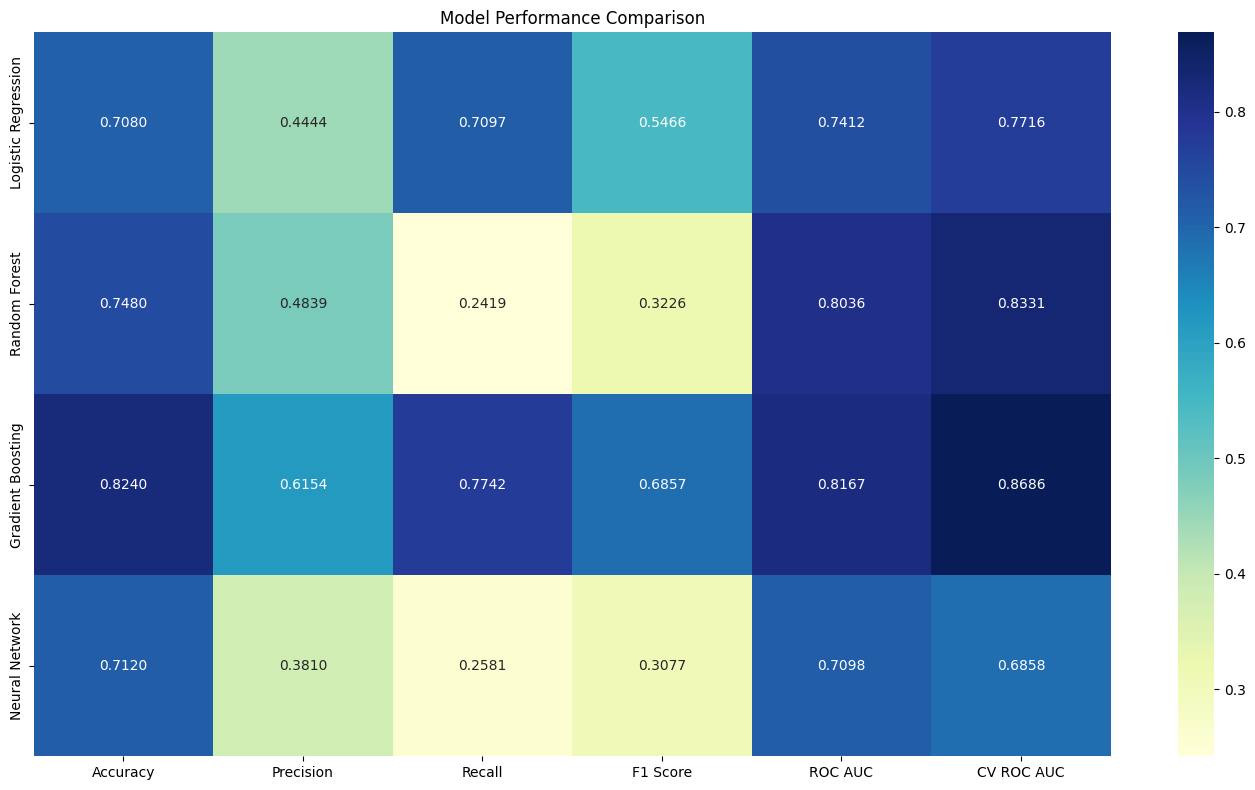

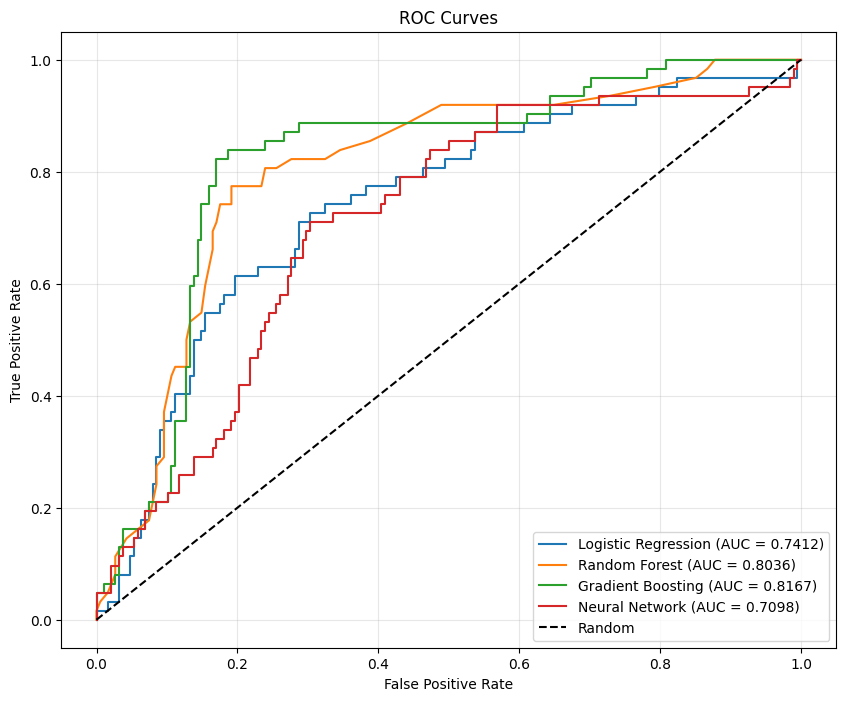

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score


def get_sample_weights(y_train):
    """Generate sample weights based on class distribution"""
    weights = np.ones(len(y_train))
    weights[y_train == 1] = 3.05  # Increase weight for fraud cases
    return weights

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Fit the model with appropriate handling for each type
    if name == 'Gradient Boosting':
        # GradientBoostingClassifier doesn't support class_weight directly
        sample_weights = get_sample_weights(y_train)
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    elif name == 'Neural Network':
        model.fit(X_train_scaled, y_train)
    else:
        # LogisticRegression and RandomForestClassifier support class_weight directly
        model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) 

    if name == 'Gradient Boosting':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'CV ROC AUC': np.mean(cv_scores),
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Cross-validation ROC AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    tn, fp, fn, tp = cm.ravel()
    fraud_detection_rate = tp / (tp + fn)
    false_alarm_rate = fp / (fp + tn)
    print(f"Fraud Detection Rate: {fraud_detection_rate:.4f}")
    print(f"False Alarm Rate: {false_alarm_rate:.4f}")

# DataFrame with the results for comparison
results_df = pd.DataFrame({
    model_name: {
        'Accuracy': results[model_name]['Accuracy'],
        'Precision': results[model_name]['Precision'],
        'Recall': results[model_name]['Recall'],
        'F1 Score': results[model_name]['F1 Score'],
        'ROC AUC': results[model_name]['ROC AUC'],
        'CV ROC AUC': results[model_name]['CV ROC AUC']
    }
    for model_name in results.keys()
})

print("\nModel Comparison:")
print(results_df)

# Visualize the results
plt.figure(figsize=(14, 8))

# Create a heatmap of the metrics
sns.heatmap(results_df.T, annot=True, cmap="YlGnBu", fmt='.4f', cbar=True)
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_curve

for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['Probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

<Figure size 1200x800 with 0 Axes>

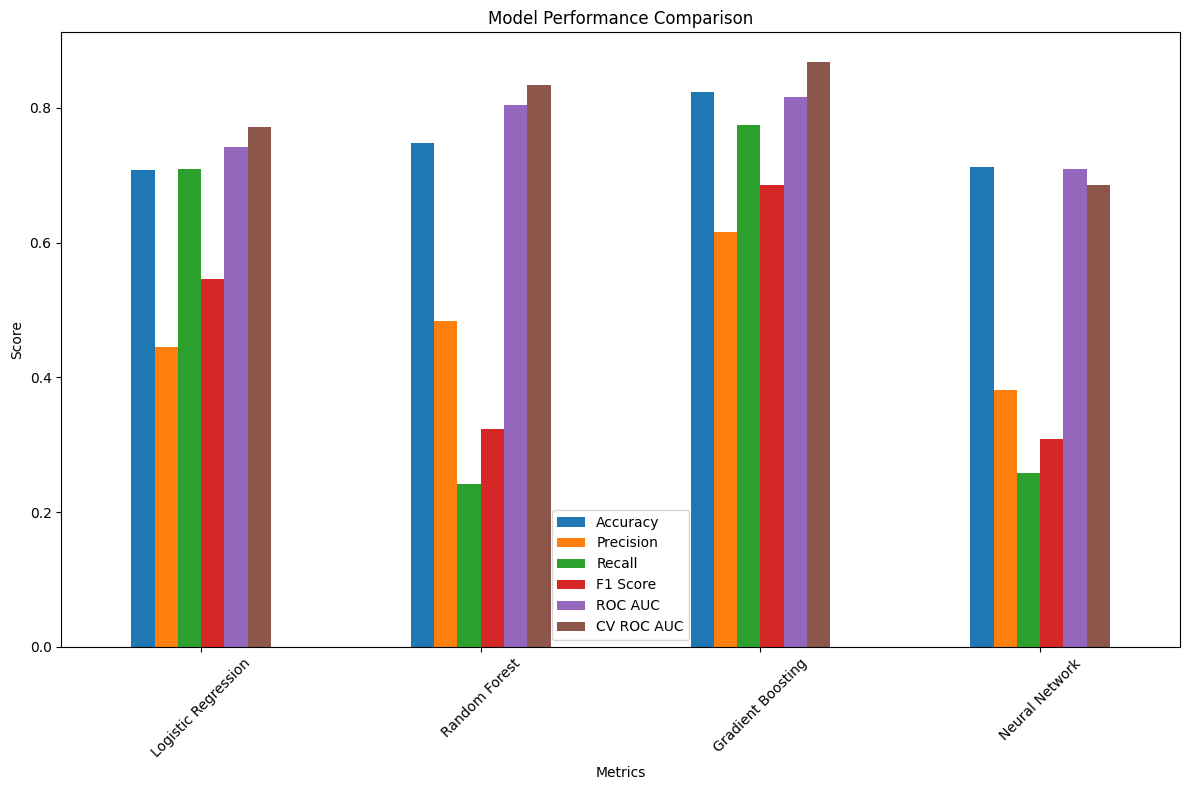


Best Model: Gradient Boosting with ROC AUC of 0.8167


In [50]:
# Visualizations
plt.figure(figsize=(12, 8))
results_df.T.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Select the best model based on ROC AUC
best_model_name = max(results.keys(), key=lambda x: results[x]['ROC AUC'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name} with ROC AUC of {results[best_model_name]['ROC AUC']:.4f}")


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Best Model:** Gradient Boosting Classifier
* **Performance:**
  * Accuracy: 82.4%
  * Precision: 61.5%
  * Recall: 77.4% (fraud detection rate)
  * F1 Score: 68.6%
  * ROC AUC: 81.7%


* **Why Selected:** Provides the best balance between fraud detection capability (77.4% of fraud caught) and reasonable precision (61.5% of flagged claims are actual fraud). Outperformed all other models in accuracy, F1 score, and AUC metrics.

* **Business Value:** For every 100 claims flagged as fraudulent, 62 are correctly identified, minimizing both false positives and false negatives compared to other models.
---

Best model (Gradient Boosting), scaler, and imputer saved to disk.


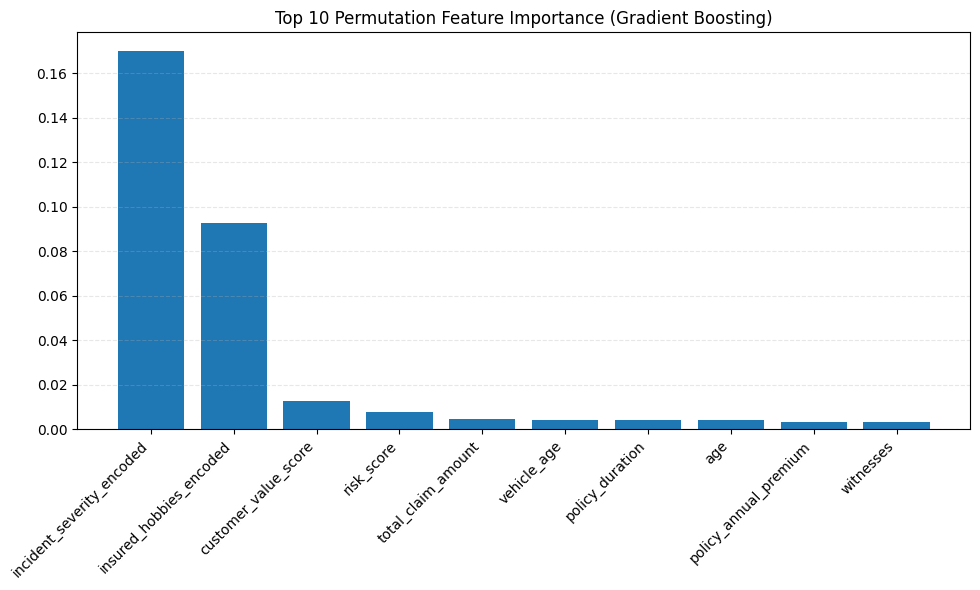


Top 10 Features (Permutation Importance):
1. incident_severity_encoded: 0.1700
2. insured_hobbies_encoded: 0.0928
3. customer_value_score: 0.0128
4. risk_score: 0.0076
5. total_claim_amount: 0.0048
6. vehicle_age: 0.0044
7. policy_duration: 0.0044
8. age: 0.0040
9. policy_annual_premium: 0.0032
10. witnesses: 0.0032


In [51]:
# Save the best model and preprocessing objects
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')
print(f"Best model ({best_model_name}), scaler, and imputer saved to disk.")

if best_model_name == 'Gradient Boosting' or best_model_name == 'Random Forest':
    # Permutation importance
    from sklearn.inspection import permutation_importance
    
    perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    
    # Sort features by importance
    perm_indices = np.argsort(perm_importance.importances_mean)[::-1]
    
    # Get feature names from preprocessed data
    feature_names = X_train_fixed.columns
    
    # Top 10 features
    top10_indices = perm_indices[:10]
    top10_features = [feature_names[i] for i in top10_indices]
    top10_importance = perm_importance.importances_mean[top10_indices]
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Top 10 Permutation Feature Importance ({best_model_name})')
    plt.bar(range(len(top10_features)), top10_importance, align='center')
    plt.xticks(range(len(top10_features)), top10_features, rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.savefig('top10_permutation_importance.png')
    plt.show()
    
    print("\nTop 10 Features (Permutation Importance):")
    for i in range(10):
        print(f"{i+1}. {top10_features[i]}: {top10_importance[i]:.4f}")